In [2]:
import pandas as pd

In [26]:
invoices = pd.read_csv('fct_invoice.csv')

invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [38]:
customers = pd.read_json('dim_customer.json')

customers

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [85]:
# How many unique customers are in the dataset?

customers = pd.read_json('dim_customer.json')

customers['id'].nunique()

5191

In [18]:
# What are the different categories of products available? 

invoices = pd.read_csv('fct_invoice.csv')

invoices['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [19]:
# How many unique categories are there?

invoices = pd.read_csv('fct_invoice.csv')

invoices['category'].nunique()

8

In [22]:
# Which payment method is the most popular? How many times was it used?

invoices['payment_method'].mode()

0    Cash
Name: payment_method, dtype: object

In [30]:
# How many times was it used?

(invoices['payment_method'] == "Cash").sum()

44447

In [81]:
# What are the three most popular categories, by total sales?

invoices = pd.read_csv('fct_invoice.csv')

invoices['total_sales'] = invoices['quantity'] * invoices['price']
invoices.groupby(['category'])['total_sales'].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [82]:
# What are the total sales attributed to customers over the age of 45?

customers = pd.read_json('dim_customer.json')
invoices = pd.read_csv('fct_invoice.csv')
invoices['total_sales'] = invoices['quantity'] * invoices['price']

customers['customer_id'] = customers['id']

merged_df = pd.merge(invoices, customers, on = 'customer_id')
merged_df[merged_df['age'] > 45]['total_sales'].sum()

82039768.15

<function matplotlib.pyplot.show(close=None, block=None)>

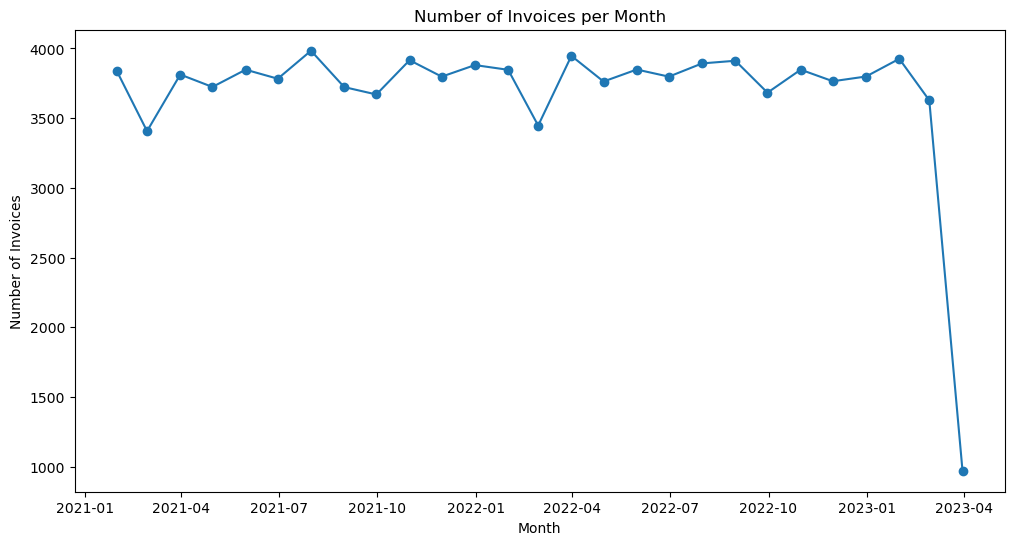

In [83]:
# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this)

import matplotlib.pyplot as plt

invoices = pd.read_csv('fct_invoice.csv')
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], format='%d/%m/%Y')
monthly_counts = invoices.resample('ME', on='invoice_date').size()

plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Number of Invoices per Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.show


In [ ]:
# We can notice that the number of sales voices often decreases during the first quarter of a year, and remains relatively steady throughout the rest of the year. 

In [84]:
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

customers = pd.read_json('dim_customer.json')
invoices = pd.read_csv('fct_invoice.csv')
invoices['total_sales'] = invoices['quantity'] * invoices['price']

customers['customer_id'] = customers['id']

merged_df = pd.merge(invoices, customers, on = 'customer_id')

def get_age_range(age):
    if pd.isna(age):
        return None
    lower = int((age // 10) * 10)
    upper = int(lower + 9)
    return f"{lower}-{upper}"

merged_df['decade_age_range'] = merged_df['age'].apply(get_age_range)

pivot = pd.pivot_table(merged_df, index='category', columns='decade_age_range', values='total_sales', aggfunc='sum', fill_value=0)

pivot

decade_age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
